In [25]:
import csv,sqlite3
con=sqlite3.connect("MacD.db")
cursor=con.cursor

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [27]:
%load_ext sql
%sql sqlite:///MacD.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [4]:
from pandas.io.sql import to_sql
import pandas as pd
from google.colab import files
import io

In [5]:
data = files.upload()

Saving menu.csv to menu.csv


In [8]:
df= pd.read_csv(io.StringIO(data['menu.csv'].decode('utf-8')))

In [41]:
df.to_sql("msd", con, if_exists='replace', index=False,method="multi")
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [28]:
%sql select count(*) from msd;

 * sqlite:///MacD.db
Done.


count(*)
260


In [30]:
%sql select name from sqlite_master where type="table"

 * sqlite:///MacD.db
Done.


name
msd


In [35]:
%sql select count(name)from PRAGMA_TABLE_INFO("msd");

 * sqlite:///MacD.db
Done.


count(name)
24


In [46]:
%sql select name ,type,length(type) from PRAGMA_TABLE_INFO('msd');

 * sqlite:///MacD.db
Done.


name,type,length(type)
Category,TEXT,4
Item,TEXT,4
Serving Size,TEXT,4
Calories,INTEGER,7
Calories from Fat,INTEGER,7
Total Fat,REAL,4
Total Fat (% Daily Value),INTEGER,7
Saturated Fat,REAL,4
Saturated Fat (% Daily Value),INTEGER,7
Trans Fat,REAL,4


In [39]:
df.describe(include ='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [73]:
from logging import warning
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**which food item has maiximum sodium content?**


In [67]:
max_sodium=%sql select Category,sodium from msd ;
max_sodium

 * sqlite:///MacD.db
Done.


Category,Sodium
Breakfast,750
Breakfast,770
Breakfast,780
Breakfast,860
Breakfast,880
Breakfast,960
Breakfast,1300
Breakfast,1410
Breakfast,1300
Breakfast,1420


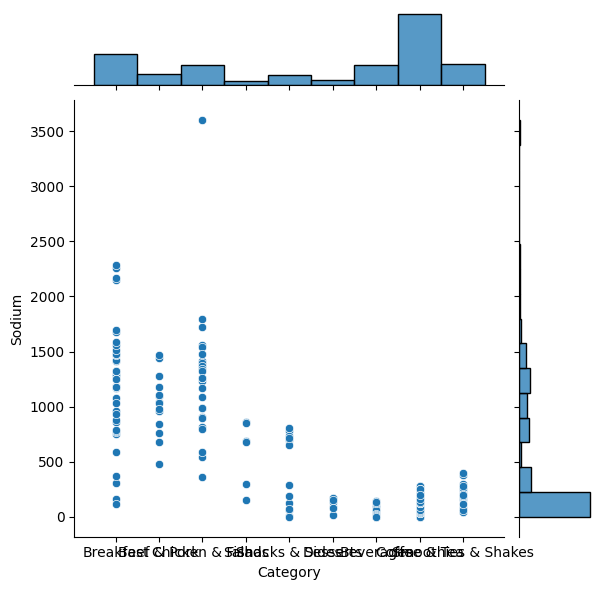

In [71]:
plot=sns.jointplot(x="Category",y="Sodium" ,data= max_sodium.DataFrame())


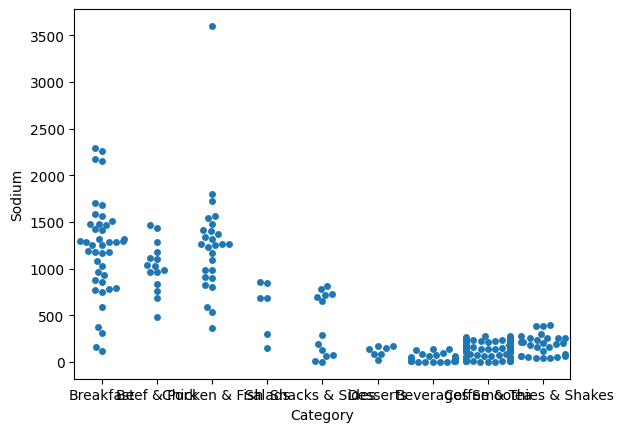

In [74]:
plot=sns.swarmplot(x="Category",y="Sodium" ,data= max_sodium.DataFrame())


**Its is cleary show that chicken and fish has highest value of sodium content which is 3600**

lets verify it

In [78]:
df['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

Row associated with max sodium variable

In [80]:
df['Sodium'].idxmax()

82

which item ha that max vaule

In [82]:
df.at[82,'Item']

'Chicken McNuggets (40 piece)'

In [89]:
%sql select * from msd limit 5;


 * sqlite:///MacD.db
Done.


Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [91]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


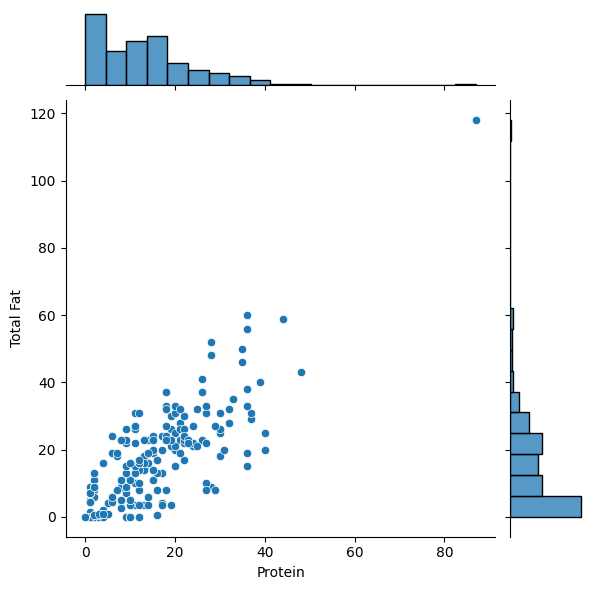

In [94]:
plot= sns.jointplot(x="Protein", y="Total Fat" ,data =df)
plt.show()

The output scatter plot is shown on the above. The plot has an interesting shape. It shows the correlation between the two variables: protein and fat. Correlation is a measure of association between two variables, and has a value of between -1 and +1. We see that the points on the scatter plot are closer to a straight line in the positive direction. So we have a positive correlation between the two variables. On the top right corner of the scatter plot, we have the values of the Pearson correlation- 0.81 and the significance of the correlation denoted as P - which is a good value that shows the variables are certainly correlated. The plot also shows two histograms: one on the top and the other on the right side. The histogram on the top is that of the variable protein, and the histogram on the right side is that of the variable total fat. We also noticed that there is a point on the scatter plot outside the general pattern. This is a possible **outlier.**

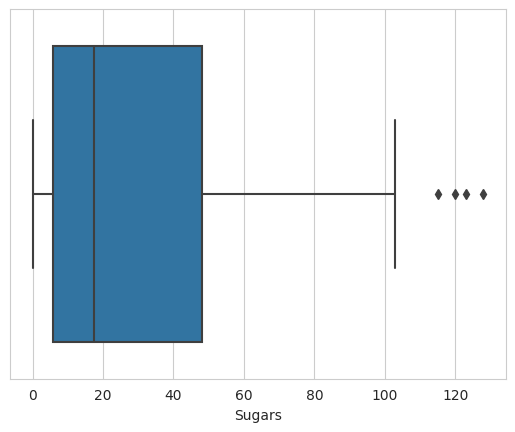

In [98]:
plot=sns.set_style("whitegrid")
box_plt=sns.boxplot(x=df['Sugars'])
plt.show()

Box plots are charts that indicate the distribution of one or more variables. The box in a box plot captures the middle 50 percent of data. Lines and points indicate possible skewness and outliers. we create a box plot for sugar. The function we are going to use is box plot from the Seaborn package. We give the column name sugars as input to the box plot function. The output is shown on the right side, where we had the box plot with average values of sugar and food items around 30 grams. Here we notice a few outliers that indicate food items with extreme values of sugar.

In [100]:
df["Sugars"].describe()

count    260.000000
mean      29.423077
std       28.679797
min        0.000000
25%        5.750000
50%       17.500000
75%       48.000000
max      128.000000
Name: Sugars, dtype: float64

In [102]:
df['Sugars'].idxmax()

253

In [103]:
df.at[253,'Item']

'McFlurry with M&M’s Candies (Medium)'